In [1]:
#Modules.
from Classes import *
import LeakyFunctions as fun

%matplotlib inline
%pylab inline

#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Parameter range.
sweepVc = arange(0.000001,0.41,0.01)

#Read data from SweepVc.
runsDeterministic = fun.readData('data/sweepVc-Deterministics')
runsStochastic = fun.readData('data/sweepVc-Stochastics')

In [3]:
#Functions.

def giveBoundaries(y):
    #Sort runs, looping over Vc's.
    y = [sorted(x) for x in y]
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    #boundaries = transpose([(x[0],x[1],x[2]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]

def plotStochastic(ax,y,color,colorBackground):
    lower, median, upper = giveBoundaries(y)
    ax.plot(sweepVc, median, linewidth=2,color=color)
    ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=color)
    ax.fill_between(sweepVc, lower, upper, color=colorBackground)


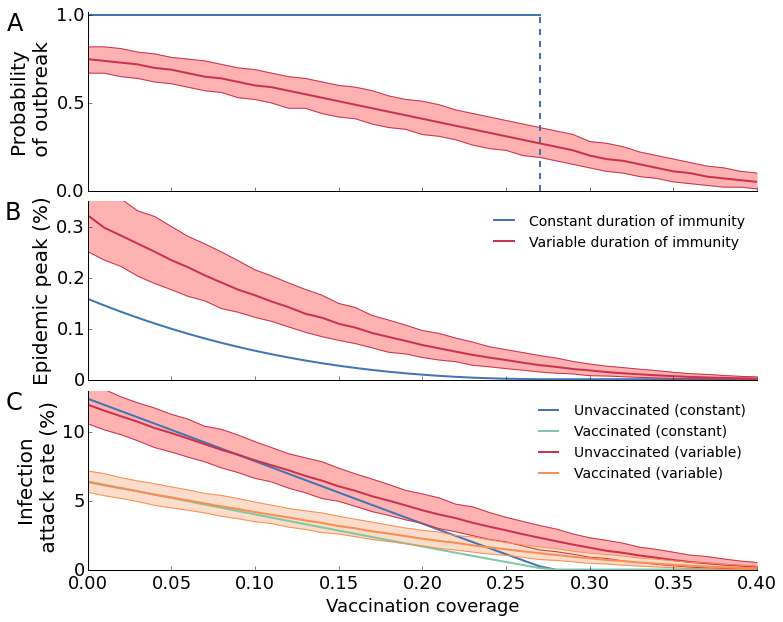

In [6]:
fig = plt.figure(figsize=(12,10))

#--------------------------------------------------------------------------
ax = fig.add_subplot(311)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)

Vcrit = 28
meanProbOutDet = [runsDeterministic[Vc].probOutbreak for Vc in sweepVc]
ax.plot(sweepVc[:Vcrit],meanProbOutDet[:Vcrit], color=myColors[9])

xPos = sweepVc[Vcrit-1]
ax.plot([xPos,xPos],[0,1],'--', color=myColors[9])

meanProbOut = [[run.probOutbreak for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanProbOut,myColors[1],[255/255.,178/255.,178/255.])


ax.set_xlim([0,0.4])
ax.set_xticklabels([])

ax.set_ylim([0,1.02])
ax.set_yticks([0,0.5,1])

ax.set_ylabel('Probability\n of outbreak', fontsize = 20)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(312)
text(-0.12, 0.9,'B',transform = ax.transAxes, fontsize = 24)

meanPeakDet = [runsDeterministic[Vc].meanPeak for Vc in sweepVc]
ax.plot(sweepVc,meanPeakDet, color = myColors[9])

meanPeak = [[run.meanPeak for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanPeak,myColors[1],[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.4])
ax.set_xticklabels([])

ax.set_ylim([0,0.0035])
ax.set_yticks([0,0.001,0.002,0.003])
ax.set_yticklabels([0,0.1,0.2,0.3])

ax.set_ylabel('Epidemic peak (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Constant duration of immunity')
ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Variable duration of immunity')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(313)
text(-0.12, 0.9,'C',transform = ax.transAxes, fontsize = 24)


meanFinalDet = [runsDeterministic[Vc].meanFinalsize['s'] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[9])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['p'] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[7])

meanFinal = [[run.meanFinalsize['s'] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[1],[255/255.,178/255.,178/255.])

meanFinal = [[run.meanFinalsize['p'] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[3],[252/255.,220/255.,202/255.])

ax.set_xlim([0,0.4])
ax.set_ylim([0,0.13])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

ax.set_xlabel('Vaccination coverage')
ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Unvaccinated (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[7],label = 'Vaccinated (constant)')
ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Unvaccinated (variable)')
ax.plot(-1, -1, linewidth=2,color=myColors[3],label = 'Vaccinated (variable)')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------

subplots_adjust(hspace = 0.06)

show()

#Save figure.
if True:
    fig.savefig('figures/sweepVcLeaky.eps')
    fig.savefig('figures/sweepVcLeaky.png')